In [ ]:
import os
import pandas as pd


import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
#import matplotlib.pyplot as plt
import pandas as pd





import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models






import time
from ultralytics import YOLO


In [2]:
dataset = "101_ObjectCategories"
print (os.listdir(dataset))

['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

In [3]:
data = []

In [4]:
for class_name in os.listdir(dataset):
    class_folder = os.path.join(dataset, class_name)
    if os.path.isdir(class_folder):
        for img_name in sorted(os.listdir(class_folder)):
            if img_name.endswith((".ppm", ".jpg", ".png", ".jpeg")):
                full_path = os.path.join(class_folder, img_name)
                
                # Convert to RGB to standardize channels
                #img =  cv2.imread(full_path)
                
                #img  = cv2.imread(full_path, cv2.COLOR_BGR2RGB)
                
                #img_array = cv2.resize(img, (64, 64))
                
                
                
                data.append({
                            "label": class_name,
                            "img_name": img_name,
                            "img_path": full_path
                            #"img_data": img_array
                        })

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head(2)

,label,img_name,img_path
0,accordion,image_0001.jpg,101_ObjectCategories\accordion\image_0001.jpg
1,accordion,image_0002.jpg,101_ObjectCategories\accordion\image_0002.jpg


In [7]:
df["label"].unique()

array(['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google',
       'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain',
       'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon',
       'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier',
       'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile',
       'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin',
       'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium',
       'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo',
       'flamingo_head', 'garfield', 'gerenuk', 'gramophone',
       'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter',
       'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp',
       'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin',
       'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes',
       'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon',
       'pizza', 'platypus', 'pyramid', 'r

In [8]:
#Appercu
print ("nombre total dimage dans le dataset:", len(df))

nombre total dimage dans le dataset: 9144


In [9]:
numbre_de_class = df["label"].nunique()
print ("numbre de classe:", numbre_de_class)

numbre de classe: 102


# Partie 1 : Prétraitement des Images (4 points)

### Questions : Y a-t-il un déséquilibre entre les catégories ? Quelles en sont les implications sur l'entraînement du modèle ?

In [10]:
distribution_des_class = df["label"].value_counts()

In [11]:
display(distribution_des_class)

label
airplanes            800
Motorbikes           798
BACKGROUND_Google    467
Faces                435
Faces_easy           435
                    ... 
gerenuk               34
wild_cat              34
binocular             33
metronome             32
inline_skate          31
Name: count, Length: 102, dtype: int64

### Tâche : Appliquez un filtre Gaussien à une image et montrez les résultats avant et après le filtrage.

In [12]:
chemin  = df.iloc[400]["img_path"]
image_chosit  = cv2.imread(chemin, cv2.COLOR_BGR2RGB)



In [13]:
gaussian=cv2.GaussianBlur(image_chosit, (5, 5), 0)

In [14]:
import matplotlib.pyplot as plt

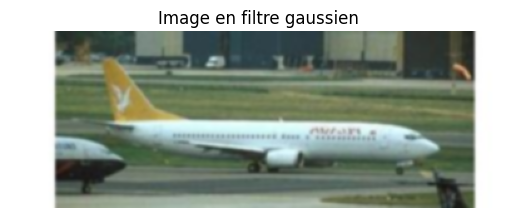

In [15]:
#plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.title('Image en filtre gaussien')
plt.axis('off')
plt.show()

### Détection des Contours

In [16]:
image_chosit_gray  = cv2.imread(chemin, cv2.COLOR_BGR2GRAY)

In [17]:
# TODO : Appliquer Sobel avec cv2.Sobel()
def apply_sobel(image):
  sobelx=cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobely=cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  sobel=np.sqrt(sobelx**2 + sobely**2)  # ou bien sobel = cv2.magnitude(sobelx, sobely)
  return cv2.convertScaleAbs(sobel)

In [18]:
sobel=apply_sobel(image_chosit_gray)

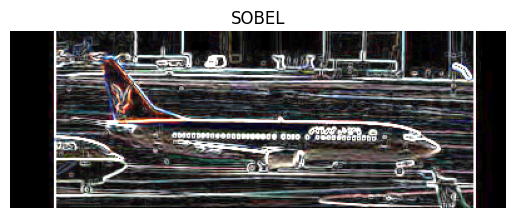

In [19]:
#plt.subplot(1, 3, 3)
plt.imshow(sobel, cmap='gray')
plt.title("SOBEL") # Set the title for each subplot
plt.axis('off')
plt.show()

# Partie 2 : Transformation et Extraction de Caractéristiques (6 points)

### Transformations Géométriques

In [20]:
image_chosit_bgr =  cv2.imread(chemin)

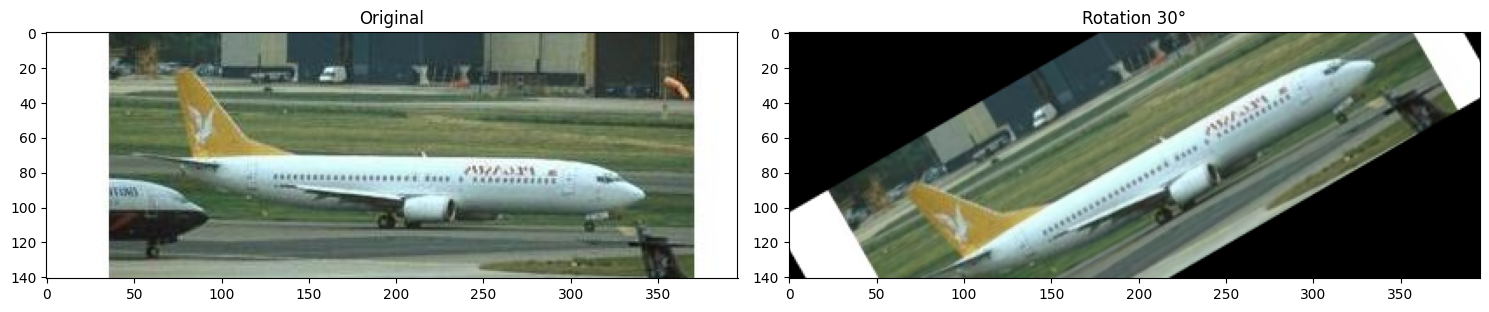

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image

image_bgr = image_chosit_bgr

# Convertir en RGB pour affichage
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
height, width = image_rgb.shape[:2]

# --- Partie 1 : Rotation ---
M_rotation = cv2.getRotationMatrix2D((width/2, height/2), 30, 1.0)
rotated = cv2.warpAffine(image_rgb, M_rotation, (width, height))

# --- Affichage ---
plt.figure(figsize=(15, 10))

plt.subplot(221), plt.imshow(image_rgb), plt.title("Original")
plt.subplot(222), plt.imshow(rotated), plt.title("Rotation 30°")


plt.tight_layout()
plt.show()

### Descripteurs Classiques

In [22]:
#import xml.etree.ElementTree as ET
from skimage.feature import hog
from skimage import color

In [23]:
mon_image_bgr = cv2.imread(chemin)
mon_image_gray  = cv2.cvtColor(mon_image_bgr, cv2.COLOR_BGR2GRAY)

In [24]:
image_chosit

image_chosit_128 = cv2.resize(mon_image_gray, (128, 128))

In [25]:
features, hog_image = hog(
    image_chosit_128,
    orientations = 9,
    pixels_per_cell = (8, 8),
    cells_per_block = (2,2),
    block_norm = 'L2-Hys',
    visualize = True
    
)

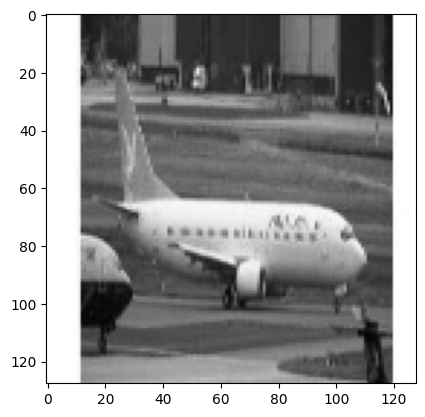

In [26]:
plt.imshow(image_chosit_128, cmap='gray')

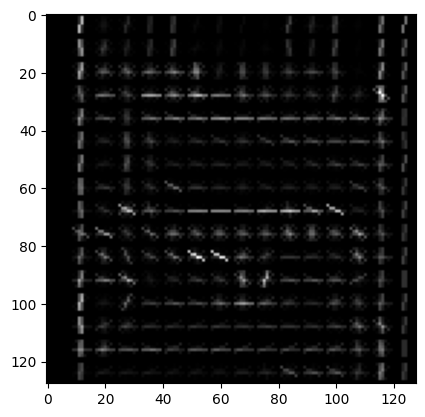

In [27]:
plt.imshow(hog_image, cmap='gray')


In [28]:
#taille des vecteur
print(features.shape)

(8100,)


### Segmentation

In [29]:
#image_chosit = image en rgb

In [30]:
from sklearn.cluster import KMeans

In [31]:
height, width = image_chosit.shape[:2]

In [32]:
height

141

In [33]:
#preparer les data pour le cluster (transformer l'image en vecteur  R, G, B)

pixels = image_chosit.reshape((-1, 3))
pixels = np.float32(pixels)

In [34]:
k = 4
Kmeans = KMeans(n_clusters=k, n_init=10)
Kmeans.fit(pixels)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [35]:
#j'applique le k-mean
centers = np.uint8(Kmeans.cluster_centers_)
labels = Kmeans.labels_
segment_image = centers[labels.flatten()]
segment_image = segment_image.reshape((height, width, 3))

Text(0.5, 1.0, 'Image segmeter')

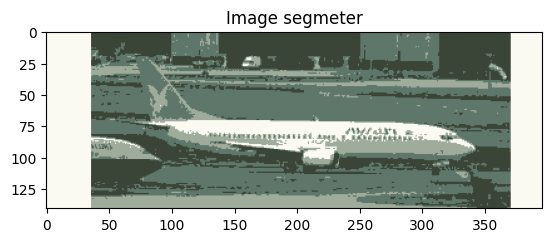

In [36]:
plt.imshow(segment_image)
plt.title("Image segmeter")

# Partie 3 : Classification et Évaluation de Modèles (6 points)

### Entraînement d’un CNN sur Caltech 101 

In [37]:

ne_data = []

In [38]:
for class_name in os.listdir(dataset):
    class_folder = os.path.join(dataset, class_name)
    if os.path.isdir(class_folder):
        
        #preendre 50 image par dossier
        #list_image =  sorted(os.listdir(class_folder))
        
        for img_name in sorted(os.listdir(class_folder)): #preendre 10 image par dossier
            if img_name.endswith((".ppm", ".jpg", ".png", ".jpeg")):
                full_path = os.path.join(class_folder, img_name)
                
                # Convert to RGB to standardize channels
                #img =  cv2.imread(full_path)
                
                img  = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
                
                img = cv2.resize(img, (64, 64))
                
                
                #Image rotated
                height, width = img.shape[:2]
                M_rotation = cv2.getRotationMatrix2D((width/2, height/2), 45, 1.0)
                rotated = cv2.warpAffine(img, M_rotation, (width, height))
                
                
                ne_data.append({
                            "label": class_name,
                            "img_name": img_name,
                            "img_path": full_path,
                            "img_data": img,
                            "rotated_img_data": rotated
                        })

In [39]:
n_df = pd.DataFrame(ne_data)

In [40]:
X = list(n_df["img_data"])
y = list(n_df["label"])

In [41]:

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0  # normalisation
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = tf.keras.utils.to_categorical(y_encoded)



In [42]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

In [43]:

# Définition d'un CNN simple (TP7)
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(102, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\TCHOULA\Downloads\ia_school\pyten\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │         3,366 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,902 (816.02 KB)

 Trainable params: 208,902 (816.02 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:

# Entraînement rapide
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    #validation_split=0.1,
    verbose=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1668 - loss: 4.0688 - val_accuracy: 0.2799 - val_loss: 3.3687
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3133 - loss: 3.2345 - val_accuracy: 0.3455 - val_loss: 3.0681
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3858 - loss: 2.8243 - val_accuracy: 0.4024 - val_loss: 2.7354
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4338 - loss: 2.4805 - val_accuracy: 0.4150 - val_loss: 2.5951
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4841 - loss: 2.2150 - val_accuracy: 0.4248 - val_loss: 2.5341
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4932 - loss: 2.1274 - val_accuracy: 0.4314 - val_loss: 2.4778
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5316 - loss: 1.9060 - val_accuracy: 0.4347 - val_loss: 2.5056
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5510 - loss: 1.8098 - val_accuracy: 0.

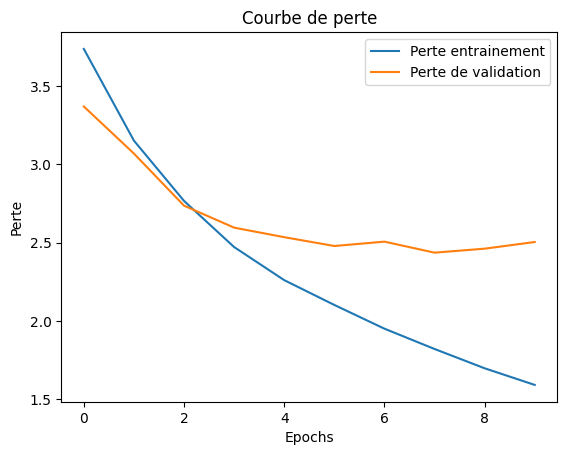

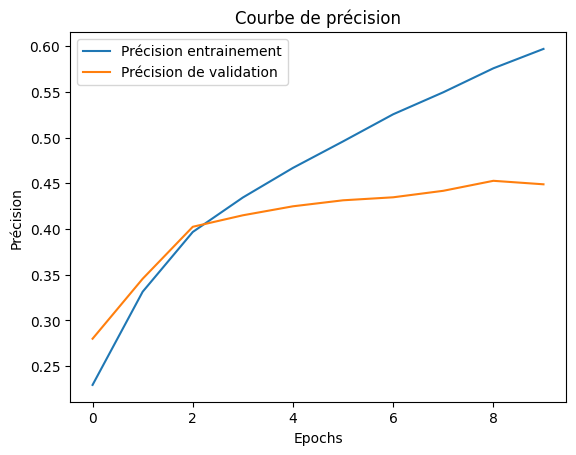

In [46]:
#Tracer la courbe de perte
plt.plot(history.history['loss'], label='Perte entrainement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Courbe de perte')
plt.legend()
plt.show()

#Tracer la courbe de précision
plt.plot(history.history['accuracy'], label='Précision entrainement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Courbe de précision')
plt.legend()
plt.show()

### Augmentation des Données et Impact sur la Classification



Epoch 1/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3761 - loss: 2.7086 - val_accuracy: 0.3516 - val_loss: 2.9386
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3934 - loss: 2.6249 - val_accuracy: 0.3767 - val_loss: 2.7447
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3933 - loss: 2.6018 - val_accuracy: 0.3712 - val_loss: 2.8358
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4070 - loss: 2.5891 - val_accuracy: 0.3816 - val_loss: 2.7510
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4054 - loss: 2.5550 - val_accuracy: 0.3680 - val_loss: 2.8134
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4108 - loss: 2.5245 - val_accuracy: 0.3800 - val_loss: 2.7246
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4048 - loss: 2.5448 - val_accuracy: 0.3876 - val_loss: 2.7432
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4199 - loss: 2.4951 - val_accu

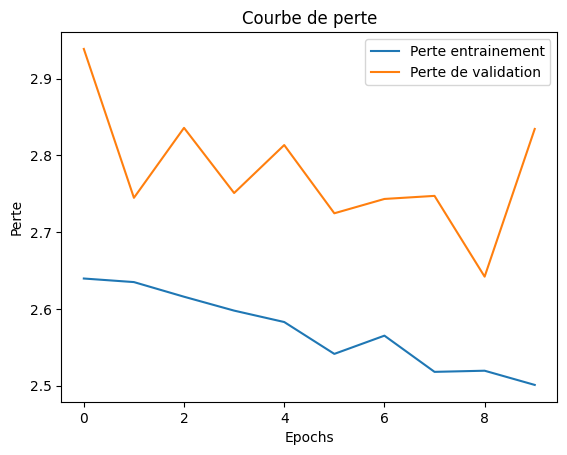

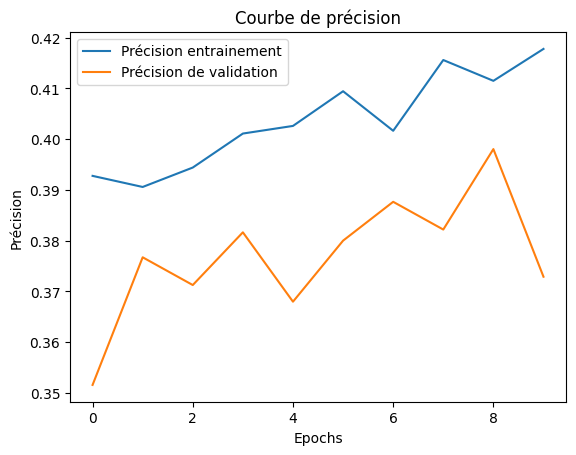

In [50]:
'''Xr = list(n_df["rotated_img_data"])


Xr = np.array(Xr).reshape(-1, 64, 64, 1) / 255.0  # normalisation
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = tf.keras.utils.to_categorical(y_encoded)

Xr_train, Xr_test, y_train, y_test = train_test_split(
    Xr, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# Définition d'un CNN simple 
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(102, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()'''

# Augmentation d'image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 45,
    zoom_range = 0.1,
    horizontal_flip = True
)

datagen.fit(X_train)

# Entraînement rapide
history = model.fit(
    datagen.flow(
        X_train, y_train, batch_size=16
    ),
    
    epochs=10,
    
    #validation_split=0.1,
    verbose=1,
    validation_data=(X_test, y_test)
)

#Tracer la courbe de perte
plt.plot(history.history['loss'], label='Perte entrainement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Courbe de perte')
plt.legend()
plt.show()

#Tracer la courbe de précision
plt.plot(history.history['accuracy'], label='Précision entrainement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Courbe de précision')
plt.legend()
plt.show()

# Partie 4 : Détection d'Objets avec YOLO (4 points)

In [77]:
df_sample = df.groupby("label").sample(n =1)


0: 416x640 1 cell phone, 1 scissors, 149.5ms
Speed: 1.9ms preprocess, 149.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


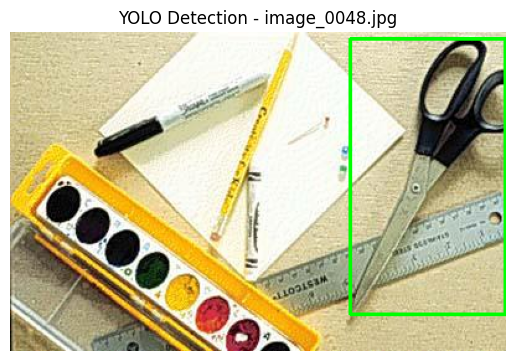


0: 448x640 1 person, 1 tie, 1 chair, 1 tv, 1 book, 154.5ms
Speed: 1.9ms preprocess, 154.5ms inference, 8.5ms postprocess per image at shape (1, 3, 448, 640)


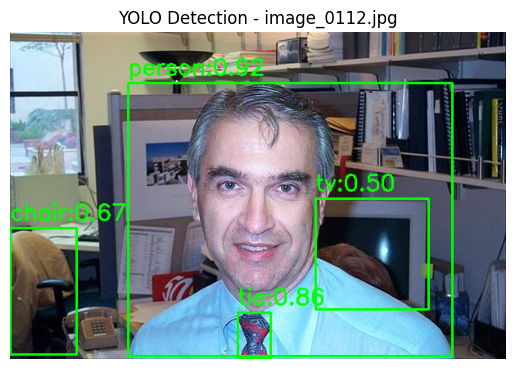


0: 640x576 1 person, 201.2ms
Speed: 4.3ms preprocess, 201.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


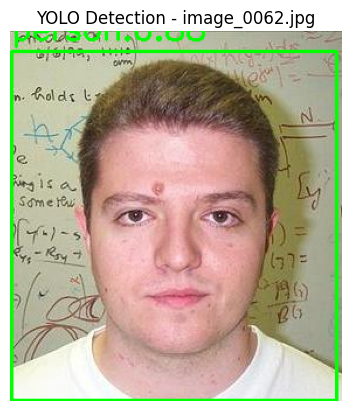


0: 448x640 (no detections), 210.7ms
Speed: 1.9ms preprocess, 210.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


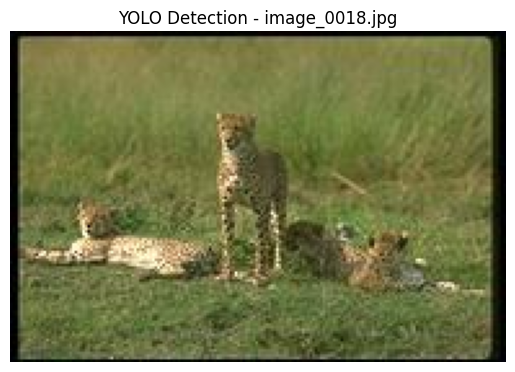


0: 352x640 1 motorcycle, 321.5ms
Speed: 2.4ms preprocess, 321.5ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


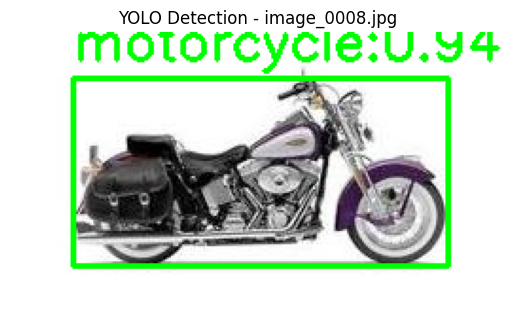


0: 640x608 (no detections), 216.2ms
Speed: 5.4ms preprocess, 216.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 608)


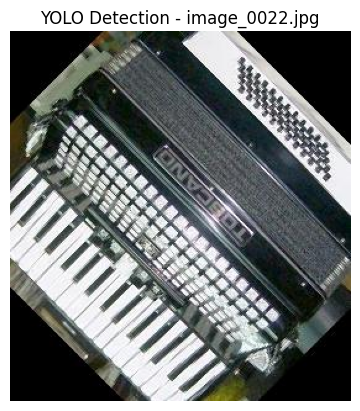


0: 288x640 1 airplane, 147.3ms
Speed: 2.6ms preprocess, 147.3ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)


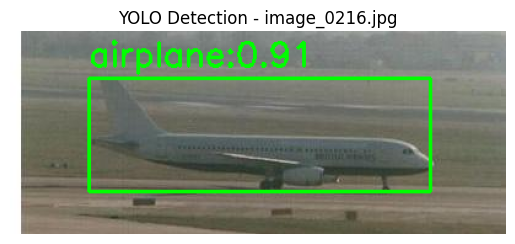


0: 576x640 (no detections), 223.7ms
Speed: 4.1ms preprocess, 223.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)


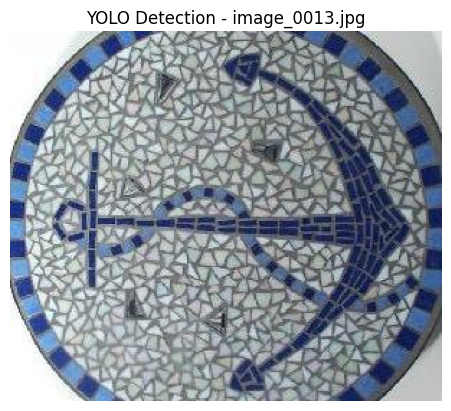


0: 544x640 1 person, 230.2ms
Speed: 3.4ms preprocess, 230.2ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)


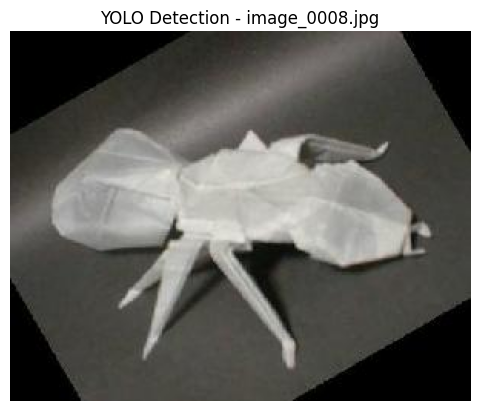


0: 640x448 1 vase, 180.7ms
Speed: 2.0ms preprocess, 180.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)


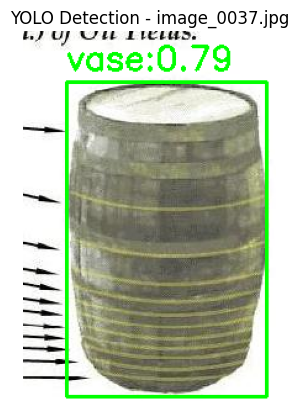

In [ ]:
# Exemple avec Ultralytics :
from ultralytics import YOLO
model = YOLO("yolov8s.pt")


for index, row in df_sample[:10].iterrows():
  # Charger l'image
  image_path=row["img_path"] #ceci vien du df_sample dataframe
  image=cv2.imread(image_path)

  # Appliquer la détection YOLO
  start_time=time.time()
  results=model(image)
  end_time=time.time()

  # Récupérer les résultats de la détection pour la première image (dans results[0])
  boxes=results[0].boxes  # Boites englobants(x, y, w, h)
  scores=boxes.conf.cpu().numpy()  # Scores de confiance
  classes = boxes.cls.cpu().numpy()  # Classes prédites

  # dessiner les résultats
  for i, (box, score, cls) in enumerate(zip(boxes.xywh.cpu().numpy(), scores, classes)):
    if score >0.5 : #Seuil de confiance pour afficher
      x, y, w, h = box #Coordonnées de la boite englobante
      label=model.names[int(cls)] # Nom de la classe
      confience = score

      # Dessiner la boite englobante
      cv2.rectangle(image,(int(x-w/2),int(y-h/2)),(int(x+w/2),int(y+h/2)),(0,255,0),2)
      # Ajouter un texte avec la classe et le score de confiance
      cv2.putText(image,f"{label}:{confience:.2f}",(int(x-w/2),int(y-h/2)-10),cv2.FONT_HERSHEY_SIMPLEX, 0.9,(0,255,0),2)

  # Convertir BGR en RGB pour afficher
  img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  # Afficher l'image avec les rectangles détectés
  plt.imshow(img_rgb)
  plt.title(f'YOLO Detection - {row["img_name"]}')
  plt.axis('off')
  plt.show()


